<a href="https://colab.research.google.com/github/Ha-minss/Personal-Projects/blob/main/%EC%9E%AC%EC%83%9D%EC%97%90%EB%84%88%EC%A7%80_%EC%84%B8%EB%AF%B8%EB%82%98%EC%B5%9C%EC%A2%85%ED%8C%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import os
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, randint, uniform
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    LabelEncoder,
    PolynomialFeatures,
)
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    StackingRegressor,
)
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
files.upload()  # 여기서 kaggle.json 파일 선택

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"ehdgk0725","key":"efa68270d8926dcaeb86446184e814ea"}'}

In [3]:
# 1) ~/.kaggle 디렉토리 생성
!mkdir -p ~/.kaggle
# 2) 업로드된 kaggle.json을 이동
!cp kaggle.json ~/.kaggle/
# 3) 권한 설정 (안전하게 읽기 전용)
!chmod 600 ~/.kaggle/kaggle.json
# 4) Kaggle API 클라이언트 설치
!pip install -q kaggle

In [4]:
# Download latest version
path = kagglehub.dataset_download("hajraamir21/global-renewable-energy-usage-2020-2024")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/global-renewable-energy-usage-2020-2024


In [5]:
files = os.listdir(path)
print("Files in dataset folder:", files)

Files in dataset folder: ['Renewable_Energy_Usage_Sampled.csv']


In [6]:
base_path = path
# 3) CSV 파일 이름 골라서 읽기
csv_name = next(f for f in os.listdir(base_path) if f.lower().endswith(".csv"))
csv_path = os.path.join(base_path, csv_name)
df = pd.read_csv(csv_path)

# 4) 데이터 확인
print(f"\nLoaded `{csv_name}` with shape:", df.shape)
display(df.head())


Loaded `Renewable_Energy_Usage_Sampled.csv` with shape: (1000, 12)


,Household_ID,Region,Country,Energy_Source,Monthly_Usage_kWh,Year,Household_Size,Income_Level,Urban_Rural,Adoption_Year,Subsidy_Received,Cost_Savings_USD
0,H01502,North America,USA,Hydro,1043.49,2024,5,Low,Urban,2012,No,10.46
1,H02587,Australia,Australia,Geothermal,610.01,2024,4,High,Rural,2023,No,43.49
2,H02654,North America,USA,Biomass,1196.75,2024,8,Low,Rural,2017,Yes,93.28
3,H01056,South America,Colombia,Biomass,629.67,2024,7,High,Urban,2023,No,472.85
4,H00706,Africa,Egypt,Hydro,274.46,2022,7,Middle,Rural,2010,No,65.98


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Household_ID       1000 non-null   object 
 1   Region             1000 non-null   object 
 2   Country            1000 non-null   object 
 3   Energy_Source      1000 non-null   object 
 4   Monthly_Usage_kWh  1000 non-null   float64
 5   Year               1000 non-null   int64  
 6   Household_Size     1000 non-null   int64  
 7   Income_Level       1000 non-null   object 
 8   Urban_Rural        1000 non-null   object 
 9   Adoption_Year      1000 non-null   int64  
 10  Subsidy_Received   1000 non-null   object 
 11  Cost_Savings_USD   1000 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 93.9+ KB


In [8]:
df.describe()

,Monthly_Usage_kWh,Year,Household_Size,Adoption_Year,Cost_Savings_USD
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,767.325530,2021.992000,4.480000,2015.992000,248.389850
std,419.649102,1.419137,2.297581,3.973629,143.127301
min,50.740000,2020.000000,1.000000,2010.000000,10.420000
25%,402.730000,2021.000000,2.000000,2013.000000,122.122500
50%,760.190000,2022.000000,5.000000,2016.000000,242.530000
75%,1117.747500,2023.000000,6.000000,2019.000000,372.520000
max,1497.340000,2024.000000,8.000000,2024.000000,499.830000


,Cost_Savings_USD
count,1000.000000
mean,248.389850
std,143.127301
min,10.420000
25%,122.122500
50%,242.530000
75%,372.520000
max,499.830000


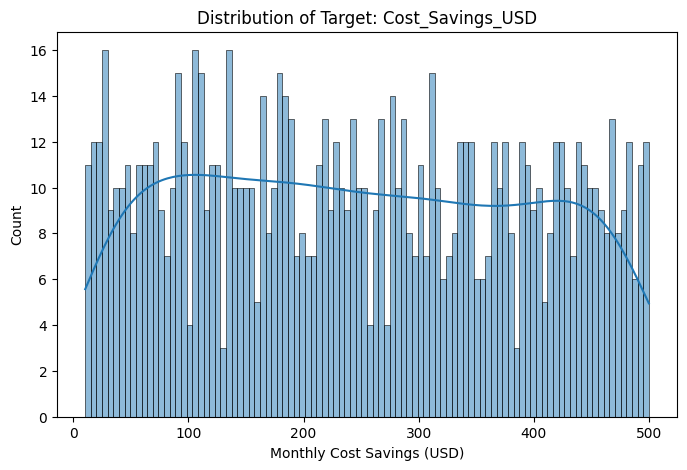

In [9]:
display(df['Cost_Savings_USD'].describe())
plt.figure(figsize=(8, 5))
sns.histplot(df['Cost_Savings_USD'], bins=100, kde=True)
plt.xlabel("Monthly Cost Savings (USD)")
plt.title("Distribution of Target: Cost_Savings_USD")
plt.show()

In [10]:
# 예시 코드
print(df['Subsidy_Received'].value_counts(normalize=True))   # 보조금 수령 비율
print("\n")

print(df['Income_Level'].value_counts(normalize=True))      # 소득 수준 분포
print("\n")

print(df['Urban_Rural'].value_counts(normalize=True))       # 도시/농촌 비율
print("\n")

print(df['Region'].value_counts())                          # 지역별 관측치 수
print("\n")

print(df['Energy_Source'].value_counts())                   # 에너지원별 관측치 수

Subsidy_Received
No     0.503
Yes    0.497
Name: proportion, dtype: float64


Income_Level
Middle    0.358
High      0.330
Low       0.312
Name: proportion, dtype: float64


Urban_Rural
Rural    0.514
Urban    0.486
Name: proportion, dtype: float64


Region
Europe           173
Australia        167
Africa           167
South America    166
North America    164
Asia             163
Name: count, dtype: int64


Energy_Source
Wind          227
Solar         201
Hydro         199
Biomass       193
Geothermal    180
Name: count, dtype: int64


,Monthly_Usage_kWh,Cost_Savings_USD,Household_Size,Adoption_Year,Year
Monthly_Usage_kWh,1.000000,0.000437,-0.024876,-0.016443,-0.016280
Cost_Savings_USD,0.000437,1.000000,-0.032560,-0.002101,0.044136
Household_Size,-0.024876,-0.032560,1.000000,0.049321,0.001486
Adoption_Year,-0.016443,-0.002101,0.049321,1.000000,0.203238
Year,-0.016280,0.044136,0.001486,0.203238,1.000000


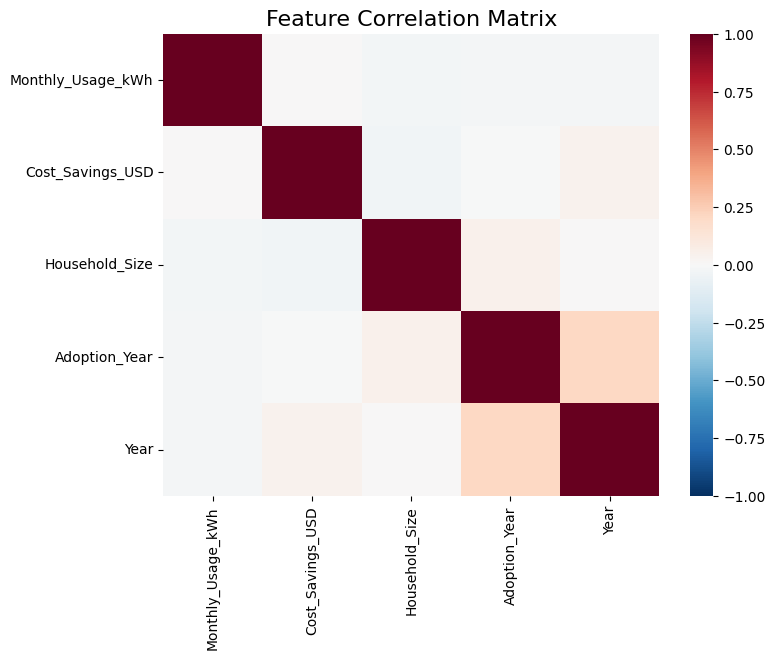

In [11]:
#상관관계파악
corr_matrix = df[['Monthly_Usage_kWh','Cost_Savings_USD','Household_Size',"Adoption_Year","Year"]].corr()
display(corr_matrix)

print("\n")
print("\n")

# 히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='RdBu_r', center=0, vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.show()

In [12]:
#결측치 처리
print(df.isna().sum())

#결측치 비율
print((df.isna().mean() * 100).round(2))

Household_ID         0
Region               0
Country              0
Energy_Source        0
Monthly_Usage_kWh    0
Year                 0
Household_Size       0
Income_Level         0
Urban_Rural          0
Adoption_Year        0
Subsidy_Received     0
Cost_Savings_USD     0
dtype: int64
Household_ID         0.0
Region               0.0
Country              0.0
Energy_Source        0.0
Monthly_Usage_kWh    0.0
Year                 0.0
Household_Size       0.0
Income_Level         0.0
Urban_Rural          0.0
Adoption_Year        0.0
Subsidy_Received     0.0
Cost_Savings_USD     0.0
dtype: float64


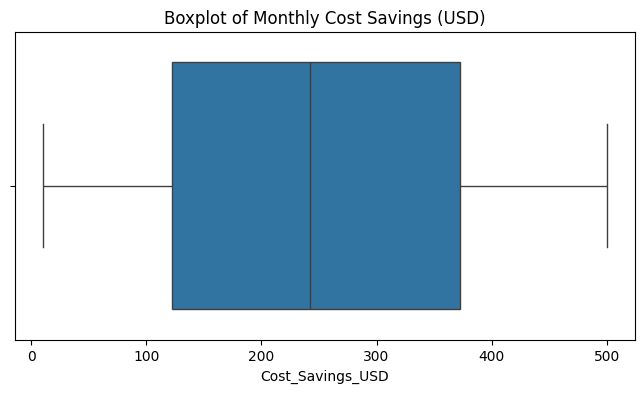

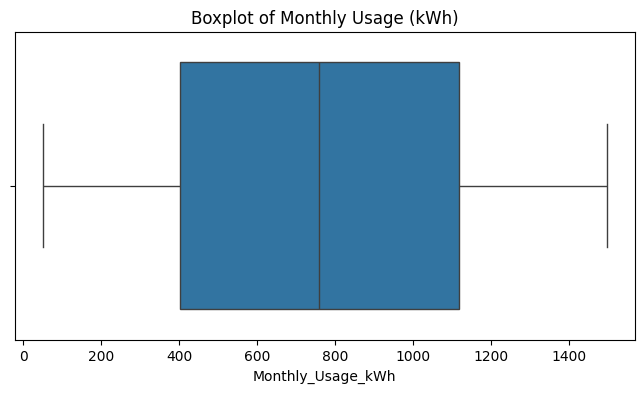

In [13]:
#이상치 체크
# Boxplot for Cost_Savings_USD
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Cost_Savings_USD'])
plt.title("Boxplot of Monthly Cost Savings (USD)")
plt.xlabel("Cost_Savings_USD")
plt.show()

# Boxplot for Monthly_Usage_kWh
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Monthly_Usage_kWh'])
plt.title("Boxplot of Monthly Usage (kWh)")
plt.xlabel("Monthly_Usage_kWh")
plt.show()

In [14]:
#왜도첨도 측정
for col in ['Monthly_Usage_kWh','Cost_Savings_USD']:
  print(col,
        "skew", skew(df[col].dropna()).round(3),
        "kurtosis", kurtosis(df[col].dropna()).round(3))

Monthly_Usage_kWh skew 0.003 kurtosis -1.203
Cost_Savings_USD skew 0.069 kurtosis -1.212


In [22]:
# 1) 타깃 정의
df['Usage_per_Person'] = df['Monthly_Usage_kWh'] / df['Household_Size']
y = df['Usage_per_Person']

# 2) 피처 엔지니어링
df['Years_Since_Adoption'] = df['Year'] - df['Adoption_Year']
df['Subsidy_dummy']        = (df['Subsidy_Received']=='Yes').astype(int)
df['Income_ord']           = df['Income_Level'].map({'Low':0,'Middle':1,'High':2})
df['Income_Subsidy_inter'] = df['Income_ord'] * df['Subsidy_dummy']

# 3) X_raw 구성 (y, Monthly_Usage_kWh, Household_Size, Cost_Savings_USD, Household_ID만 제거)
X_raw = df.drop(columns=[
    'Usage_per_Person','Monthly_Usage_kWh','Household_Size',
    'Cost_Savings_USD','Household_ID'
])

# 4) 실제 남아 있는 컬럼 확인
print("Available columns:", X_raw.columns.tolist())

# 5) numeric_features / categorical_features 재정의
numeric_features = [
    'Years_Since_Adoption',
    'Year',             # 그대로 두고 싶다면 포함
    # 'Adoption_Year',  # 만약 X_raw에 없다면 이 줄을 주석 처리하세요
    'Subsidy_dummy',
    'Income_ord',
    'Income_Subsidy_inter'
]
# X_raw.columns에 없다면 제거합니다
numeric_features = [c for c in numeric_features if c in X_raw.columns]

categorical_features = [c for c in
    ['Region','Country','Energy_Source','Urban_Rural']
    if c in X_raw.columns
]

# 6) 전처리기 정의
preprocessor = ColumnTransformer([
    # 숫자형 스케일링
    ('num', StandardScaler(), numeric_features),
    # 범주형: drop=None(모두 인코딩), handle_unknown='ignore'로 훈련에 없던 값도 처리
    ('cat', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'),
            categorical_features),
])

# 7) 적용
X_trans = preprocessor.fit_transform(X_raw)

# 8) 피처 이름 다시 뽑기
cat_cols     = preprocessor.named_transformers_['cat']\
                  .get_feature_names_out(categorical_features)
feature_names = numeric_features + list(cat_cols)

print("One-Hot 후 피처 개수:", X_trans.shape[1])
print(feature_names)

Available columns: ['Region', 'Country', 'Energy_Source', 'Year', 'Income_Level', 'Urban_Rural', 'Adoption_Year', 'Subsidy_Received', 'Years_Since_Adoption', 'Subsidy_dummy', 'Income_ord', 'Income_Subsidy_inter']
One-Hot 후 피처 개수: 43
['Years_Since_Adoption', 'Year', 'Subsidy_dummy', 'Income_ord', 'Income_Subsidy_inter', 'Region_Africa', 'Region_Asia', 'Region_Australia', 'Region_Europe', 'Region_North America', 'Region_South America', 'Country_Argentina', 'Country_Australia', 'Country_Brazil', 'Country_Canada', 'Country_Chile', 'Country_China', 'Country_Colombia', 'Country_Egypt', 'Country_France', 'Country_Germany', 'Country_Ghana', 'Country_India', 'Country_Indonesia', 'Country_Italy', 'Country_Japan', 'Country_Kenya', 'Country_Mexico', 'Country_New Zealand', 'Country_Nigeria', 'Country_Peru', 'Country_South Africa', 'Country_South Korea', 'Country_Spain', 'Country_UK', 'Country_USA', 'Energy_Source_Biomass', 'Energy_Source_Geothermal', 'Energy_Source_Hydro', 'Energy_Source_Solar', 'E

In [23]:
# 피처 이름 확보
cat_cols    = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_feats)
feature_names = numeric_features + list(cat_cols)

# --- 3) 상관관계 계산 & 출력 ---
X_df = pd.DataFrame(X_trans, columns=feature_names)
corr_with_y = X_df.corrwith(y).abs().sort_values(ascending=False)
print("⇒ Target과의 절대 상관계수\n", corr_with_y)

# --- 4) RandomForest 기반 중요도 계산 & 출력 ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_trans, y)
importances = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)
print("\n⇒ RandomForest Feature Importances\n", importances)

⇒ Target과의 절대 상관계수
 Income_ord                  0.066010
Country_Chile               0.055729
Country_Kenya               0.054686
Country_New Zealand         0.050911
Income_Subsidy_inter        0.050135
Urban_Rural_Rural           0.048372
Urban_Rural_Urban           0.048372
Country_Peru                0.046223
Country_India               0.042297
Country_UK                  0.041067
Region_Australia            0.040811
Country_USA                 0.039060
Region_Africa               0.037212
Country_Egypt               0.036490
Country_Indonesia           0.033111
Country_Japan               0.032872
Year                        0.031339
Years_Since_Adoption        0.030372
Region_Asia                 0.025486
Country_Canada              0.020957
Energy_Source_Hydro         0.020104
Country_Italy               0.019581
Country_Ghana               0.017166
Region_North America        0.014928
Country_South Africa        0.014500
Subsidy_dummy               0.014403
Country_Colombia  

In [26]:
# 1) split on the raw DataFrame
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.2, random_state=42
)

# 2) apply your ColumnTransformer to get pure numeric arrays
X_train = preprocessor.fit_transform(X_train_raw)
X_test  = preprocessor.transform(X_test_raw)

In [27]:
# 2) Manually chosen hyperparameters for speed + new models
base_estimators = [
    ('rf',   Pipeline([('scale', StandardScaler()),
                       ('model', RandomForestRegressor(n_estimators=500, max_depth=50, random_state=42, n_jobs=-1))])),
    ('gb',   Pipeline([('scale', StandardScaler()),
                       ('model', GradientBoostingRegressor(n_estimators=80, learning_rate=0.1, max_depth=4, random_state=42))])),
    ('lgbm', Pipeline([('scale', StandardScaler()),
                       ('model', LGBMRegressor(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42))]))
]

# 3) Define stacking with a lightweight meta-model
stack_model = StackingRegressor(
    estimators=base_estimators,
    final_estimator=XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=4, random_state=42, verbosity=0),
    cv=8,
    n_jobs=-1,
    passthrough=False
)

# 4) Fit and evaluate as before
stack_model.fit(X_train, y_train)

print("=== Base Model Metrics ===")
for name, fitted_pipe in stack_model.named_estimators_.items():
    y_pred = fitted_pipe.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape_val = mean_absolute_percentage_error(y_test, y_pred) * 100
    print(f"{name:>6} RMSE: {rmse:.2f}, MAPE: {mape_val:.2f}%")

y_pred_stack = stack_model.predict(X_test)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
mape_stack = mean_absolute_percentage_error(y_test, y_pred_stack) * 100
print(f"\nStacking Model RMSE: {rmse_stack:.2f}, MAPE: {mape_stack:.2f}%")

=== Base Model Metrics ===
    rf RMSE: 336.19, MAPE: 273.40%
    gb RMSE: 342.95, MAPE: 273.70%
  lgbm RMSE: 329.28, MAPE: 254.60%

Stacking Model RMSE: 322.34, MAPE: 257.35%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
